<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 3 (Variant Calling) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 6th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Getting ready for variant calling**
### *Total Questions: 6*
### *Total Points: 5 + 5 + 30 + 45 + 20 + 45 = 150*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check your SAM file</h3>
    <p>We will start from where we left off in Project #2. We want to make sure that we are using the corrent SAM file.</p>
</div>

In [15]:
#Check you SAM file here.
!head ~/scratch/Data/Project2/SRR058947.sorted.sam

@HD	VN:1.6	SO:coordinate
@SQ	SN:NC_000001.11	LN:248956422
@SQ	SN:NT_187361.1	LN:175055
@SQ	SN:NT_187362.1	LN:32032
@SQ	SN:NT_187363.1	LN:127682
@SQ	SN:NT_187364.1	LN:66860
@SQ	SN:NT_187365.1	LN:40176
@SQ	SN:NT_187366.1	LN:42210
@SQ	SN:NT_187367.1	LN:176043
@SQ	SN:NT_187368.1	LN:40745


<div class="alert alert-block alert-warning">
    <h3>1.2 Check your SAM file</h3>
    <p>Show that your SAM file is sorted</p>
</div>

In [11]:
#Show that your SAM file is sorted by genomic coordinates.
!samtools stats ~/scratch/Data/Project2/SRR058947.sorted.sam | grep "is sorted:"

SN	is sorted:	1


In [ ]:
#This is a repeat from last project, but we want to check the sorted file again.

<div class="alert alert-block alert-warning">
    <h3>1.3 The pieleup format</h3>
    <p><b>1.3.1</b> A lot of variant callers use the pielup format for calling variants from SAM file. Explain in 2-3 lines what is the pileup format?</p>
    <p><b>1.3.2</b> Explain the 6 columns of a pielup format file in your own words.</p>
</div>

#Information about the pileup format.
Pileup is a text based format for representing alignment sequence data. It gives information about the bases from aligned reads compared to a reference sequence. 

#Information about the 6 fields of the pieleup format file.
#Write one sentence for each file.

The first column contains the sequence identifier for each read.

The second column contains the position in the reference sequence. 

The third column contains the nucleotide at that position in the reference genome.

The fourth column shows the number of reads that cover that position. 

The fifth column shows the bases observed at that position from the various aligned reads. 

The 6th column is for a quality score for the bases observed at that position based on the aligned reads. 

<div class="alert alert-block alert-warning">
    <h3>1.4 Create the pileup file</h3>
    <p>Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals</p>
</div>

In [1]:
#Run the pileup command.
!samtools mpileup -f ~/scratch/Data/Project2/GCF_000001405.40_GRCh38.p14_genomic.fna ~/scratch/Data/Project2/SRR058947.sorted.bam > ~/scratch/Data/Project3/SRR058947.mpileup

[mpileup] 1 samples in 1 input files


In [3]:
#Show the first 10 lines of the Pileup file.
!head ~/scratch/Data/Project3/SRR058947.mpileup
!echo --
#Show the 10,000 - 10,010 lines of the Pileup file.
!head ~/scratch/Data/Project3/SRR058947.mpileup -n10010 | tail
!echo --
#Show the 200,000 - 200,010 lines of the Pileup file.
!head ~/scratch/Data/Project3/SRR058947.mpileup -n200010 | tail

NC_000001.11	10001	t	1	^!.	D
NC_000001.11	10002	a	1	.	E
NC_000001.11	10003	a	3	.^!.^!.	GEA
NC_000001.11	10004	c	4	...^!.	FGFA
NC_000001.11	10005	c	4	....	GGFB
NC_000001.11	10006	c	4	....	GGFE
NC_000001.11	10007	t	4	....	GGFG
NC_000001.11	10008	a	4	....	DFGG
NC_000001.11	10009	a	4	....	GGBG
NC_000001.11	10010	c	4	....	FGGG
--
NC_000001.11	33582	t	1	,	F
NC_000001.11	33583	t	1	,	F
NC_000001.11	33584	g	1	,	F
NC_000001.11	33585	g	1	,	E
NC_000001.11	33586	A	1	,	E
NC_000001.11	33587	T	1	,	F
NC_000001.11	33588	A	1	,	E
NC_000001.11	33589	C	1	,	F
NC_000001.11	33590	A	1	,	F
NC_000001.11	33591	T	1	,$	E
--
NC_000001.11	478188	T	2	.,	GB
NC_000001.11	478189	T	2	.,	GE
NC_000001.11	478190	C	2	.,	G?
NC_000001.11	478191	A	2	.,	FF
NC_000001.11	478192	G	2	.,	GF
NC_000001.11	478193	G	2	.,	GE
NC_000001.11	478194	T	2	.,	BE
NC_000001.11	478195	A	2	.,	FB
NC_000001.11	478196	C	2	.,	ED
NC_000001.11	478197	T	2	.,	FE


<div class="alert alert-block alert-warning">
    <h3>1.5 Look more into the pileup file</h3>
    <p>Show the 100,000th entry in your pileup file and explain (2-4 lines) what information column 5 <b><i>Read Results</i></b> is providing the user</p>
</div>

In [4]:
#Show the 100,000th entry here.
!head ~/scratch/Data/Project3/SRR058947.mpileup -n100000 | tail -n1

NC_000001.11	196859	A	1	.	G


#Explain the entry here.
At the 100,000th entry the pileup file's 5th column just has a period. This means that in the single read that aligned to this reference sequence, the nucleotide in the aligned read was the same as the reference genome.

<div class="alert alert-block alert-warning">
    <h3>1.6 Plot the read count distribution</h3>
    <p>A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
    <p>Plot a graph (thin bars or line) between <b><i>Read Count (y-axis)</i></b> and <b><i>Position (x-axis)</i></b> only for <u>chromosome 20</u>.</p>
    <hr>
    <p>You can use Python for visualization, but will have to filter the pileup file using bash or python.</p>
</div>

In [6]:
#An awk command can help you create a file with just the information for chr20.
!awk '$1 == "NC_000020.11" { print $2, $4 }' ~/scratch/Data/Project3/SRR058947.mpileup > ~/scratch/Data/Project3/Chromosome20positionreadcounts.txt

Finished with file


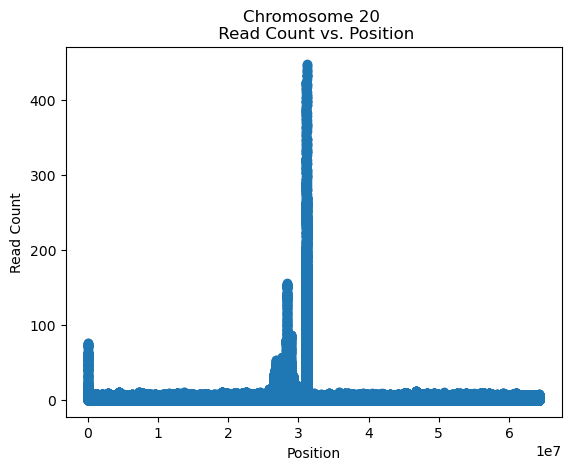

In [1]:
#Plot your graph and show it here (matplotlib/seaborn)

# Read the extracted data file
#file_path = '~/scratch/Data/Project3/Chromosome20positionreadcounts.txt'

file_path = 'P3Chr20RC.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()
    read_list = []
    for line in lines:
        read_list.append(list(map(int,line.split())))
    positions, readcounts = zip(*read_list)
    print("Finished with file")
    
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
plt.plot(positions, readcounts, marker='o', linestyle='-')
plt.xlabel('Position')
plt.ylabel('Read Count')
plt.title('Chromosome 20 \n Read Count vs. Position')
plt.show()

# **2. Variant calling**
### *Total Questions: 3*
### *Total Points: 50+30+10+40 = 130*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Call the variants (SNPs and Short Indels)</h3>
    <p><b>2.1.1</b> Write the command used and justify the flags you have used using one sentence.</p>
    <p><b>2.1.2</b> Informed decision.</p>
</div>

In [2]:
#Use VarScan for calling variants. Look up the appropriate command for this.
!varscan mpileup2snp ~/scratch/Data/Project3/SRR058947.mpileup --min-reads2 10 --output-vcf > ~/scratch/Data/Project3/SRR058947.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/cwijeyesekera3/scratch/Data/Project3/SRR058947.mpileup
1865860146 bases in pileup file
8027 variant positions (7880 SNP, 147 indel)
1054 were failed by the strand-filter
6848 variant positions reported (6848 SNP, 0 indel)


#Make an informed decision (based on section 1) about the parameters used for calling the variants.

#There is no specific answer to this, but the idea is to look into the flags used, and make sure they make sense.

We increased the increased the minimum supporting reads from a default of 2 to a default of 10. We did this for quality control to ensure that the variants we see are more likely to be actual variants rather than false positives / artifacts. 

<div class="alert alert-block alert-warning">
    <h3>2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16</h3>
    <p><b>Q.</b> What is the average depth of bases for this variant called on chromosome 16</p>
</div>

In [23]:
#Extract this variant. There are multiple ways of doing this. Some fast and some easy.
!awk '$1 == "NC_000016.10" && $2 >= 30800000  && $2 <= 40800000 { print $0 }' ~/scratch/Data/Project3/SRR058947.vcf | shuf -n 1

NC_000016.10	34582298	.	T	C	.	PASS	ADP=118;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:255:119:118:20:98:83.05%:1.0594E-46:36:34:16:4:53:45


In [2]:
#There could be multiple variants in this range, please select one.

The average depth of bases (ADP) for this variant is 118.

<div class="alert alert-block alert-warning">
    <h3>2.3 How many indels do you have in your VCF file?</p>
</div>

In [32]:
#Same as above, there are multiple ways of doing this.
!tabix -p vcf ~/scratch/Data/Project3/SRR058947.vcf.gz
!bcftools stats ~/scratch/Data/Project3/SRR058947.vcf.gz > ~/scratch/Data/Project3/vcf_stats.txt

[tabix] the index file exists. Please use '-f' to overwrite.


In [35]:
#Write your command and show the number of indels.
!awk '$1 == "SN" { print $0 }' ~/scratch/Data/Project3/vcf_stats.txt

SN	0	number of samples:	1
SN	0	number of records:	6848
SN	0	number of no-ALTs:	0
SN	0	number of SNPs:	6848
SN	0	number of MNPs:	0
SN	0	number of indels:	0
SN	0	number of others:	0
SN	0	number of multiallelic sites:	0
SN	0	number of multiallelic SNP sites:	0


Our VCF File has 0 indels. As seen above in the varscan command, we initially has 147 indels, but they were excluded due to the filtering conditions. 

<div class="alert alert-block alert-warning">
    <h3>2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.</h3>
    <p><b>2.4.1</b> What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?</p>
    <p><b>2.4.2</b> How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?</p>
</div>

In [9]:
#Select the variant.
!awk '$1 == "NC_000002.12" && $2 >= 8900000 && $2 <= 160000000 { print $0 }' ~/scratch/Data/Project3/SRR058947.vcf | shuf -n 1

NC_000002.12	90382579	.	A	C	.	PASS	ADP=14;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:76:14:14:0:14:100%:2.4927E-8:0:34:0:0:12:2


#Variation observed and number of copies for reference allele.

Our variant observed is homozygous (1/1). Our individual carries 0 copies of the reference allele. 

#Number of reads supporting the ref & alt allele.

Our individual carries 0 of the reference allele and 14 reads supporting the alt allele. 12 of the reads are on the forward strand and 2 are on the reverse strand. 

# **3. Filtering**
### *Total Questions: 1*
### *Total Points: 20 = 20*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Extract variants that have average per sample depth of > 50. </h3>
    <p>Show your command and number of variants before and after</p>
</div>

In [10]:
!varscan filter ~/scratch/Data/Project3/SRR058947.vcf --min-reads2 50 --output-file ~/scratch/Data/Project3/SRR058947.filtered.vcf

Min coverage:	10
Min reads2:	50
Min strands2:	1
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.1
Reading input from /home/hice1/cwijeyesekera3/scratch/Data/Project3/SRR058947.vcf
6848 entries in input stream
0 had no genotype
0 were called wild-type
0 failed coverage
5223 failed reads2
102 failed strands
0 failed quality
0 failed variant frequency < 0.2
0 failed P-value > 0.1
0 were removed near indels
1523 passed filters


Reading the command output we can see that initially there were 6848 variants. After filtering we only have 1523 variants.